In [1]:
from scipy.signal import butter, lfilter 
import scipy.io
import wfdb 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
signal_path = "path_to_your_data"
record = wfdb.rdrecord(signal_path)
signal = record.p_signal

In [3]:
'''
Bandpass Filter to filter out unwanted noise from the signal
'''

def bandpass_filter(signal, lowcut, highcut, sampling_rate, order = 2):
    nyquist = 0.5 * sampling_rate #100hz * 0.5 = 50hz
    low = lowcut / nyquist #0.5 hz / 50hz = 0.01hz
    high = highcut / nyquist
    b, a =  butter(order, [low, high], btype = "band")
    y = lfilter(b, a, signal)
    return y

lowcut = 0.5
highcut = 24.0
sampling_rate = 100

In [6]:
filtered_signal = bandpass_filter(flattened_data, lowcut, highcut, sampling_rate)

In [5]:
flattened_data = signal.flatten()

In [7]:
reshaped_data = filtered_signal.reshape(1000,12)

<function matplotlib.pyplot.show(close=None, block=None)>

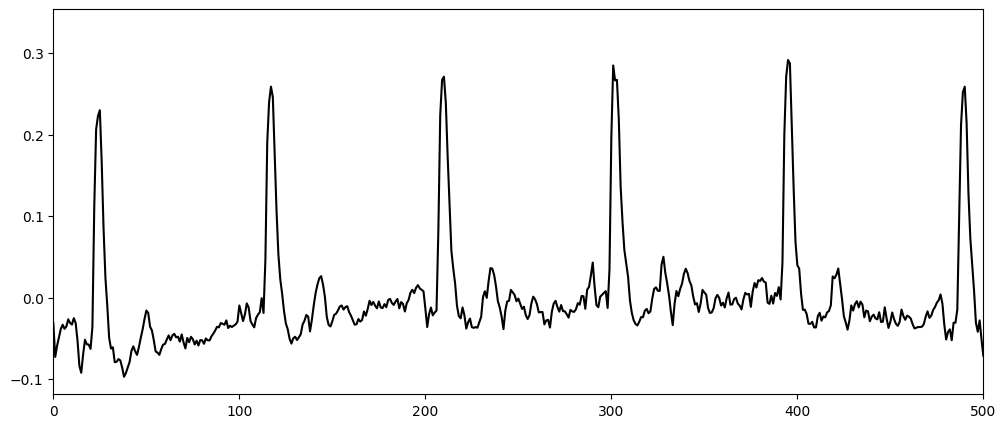

In [8]:
plt.figure(figsize = (12,5))
plt.plot(reshaped_data[:,0], color = "black")
plt.xlim(0,500)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

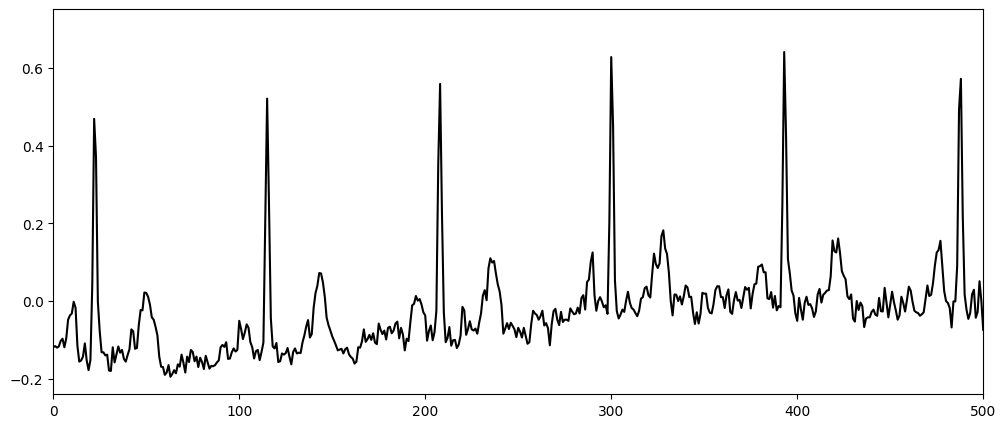

In [9]:
plt.figure(figsize = (12,5))
plt.plot(signal[:,0], color = "black")
plt.xlim(0,500)
plt.show

In [10]:
#1 Find the derivative of the signal data points
#2 Square the signal
#3 Implement the moving window 

In [11]:
def derivative_filter(ecg_signal, fs = 100):
    kernel = np.array([-1,-2,0,1,2]) * (1/8)
    return np.convolve(ecg_signal, kernel)

In [12]:
der = derivative_filter(reshaped_data[:,0],100)

<function matplotlib.pyplot.show(close=None, block=None)>

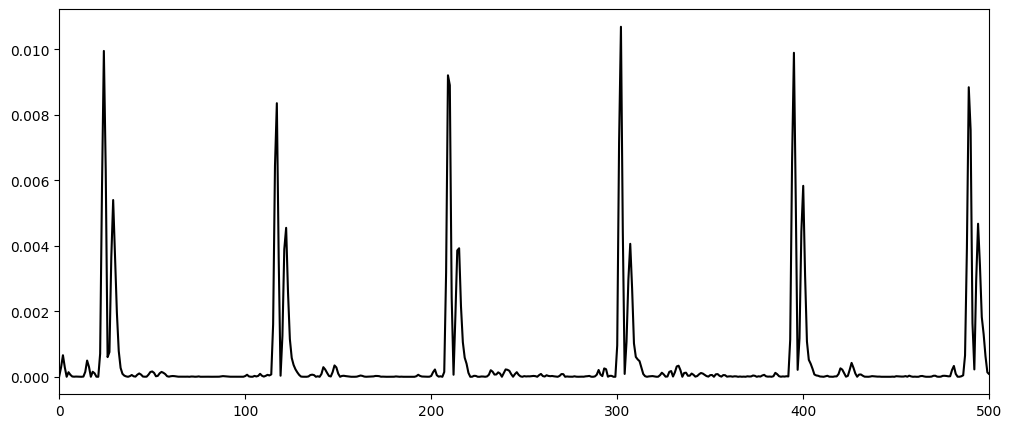

In [16]:
plt.figure(figsize = (12,5))
plt.plot(der, color = "black")
plt.xlim(0,500)
plt.show

In [17]:
squared_signal = der ** 2

In [23]:
def moving_window(signal, fs = 100, window_ms = 150):
    window_size = int((window_ms / 1000) * fs) #(150 / 1000) * 100 = (15 data points)
    window = np.ones(window_size) / window_size
    return np.convolve(signal, window)

In [24]:
window_signal = moving_window(squared_signal)

<function matplotlib.pyplot.show(close=None, block=None)>

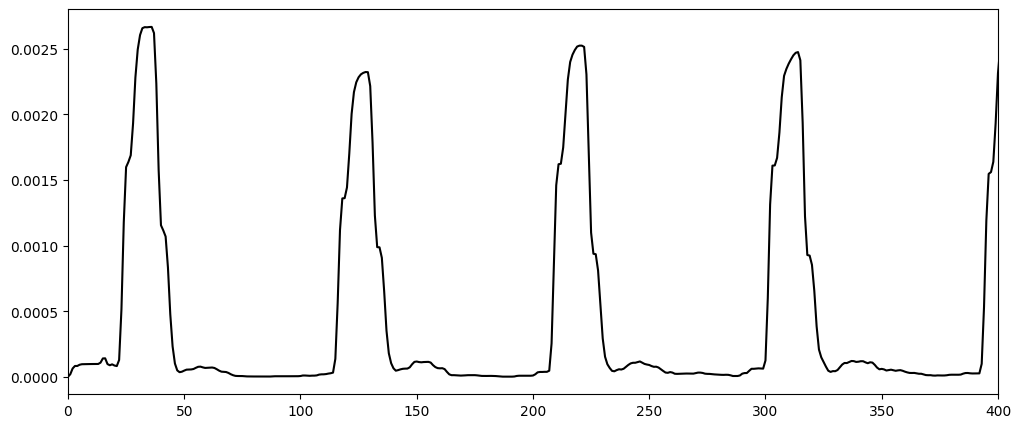

In [27]:
plt.figure(figsize = (12,5))
plt.plot(window_signal, color = "black")
plt.xlim(0,400)
plt.show

In [30]:
def manual_Rpeaks(signal, fs = 100):
    threshold = np.mean((signal) + np.max(signal)) / 2 # ([1,2,3] 1+2+3 / 3 , 1+2+3 ) 2
    min_distance = round(fs * 0.200)

    peaks = []
    length = len(signal)

    for i in range(1, length -1):
        if signal[i] > signal[i-1] and signal[i] > signal[i + 1] and signal[i] > threshold:  #[0,1,2,2,6,3,4,2,1]
            peaks.append(i)

    return np.array(peaks)

In [31]:
peaks_1 = manual_Rpeaks(window_signal)

<function matplotlib.pyplot.show(close=None, block=None)>

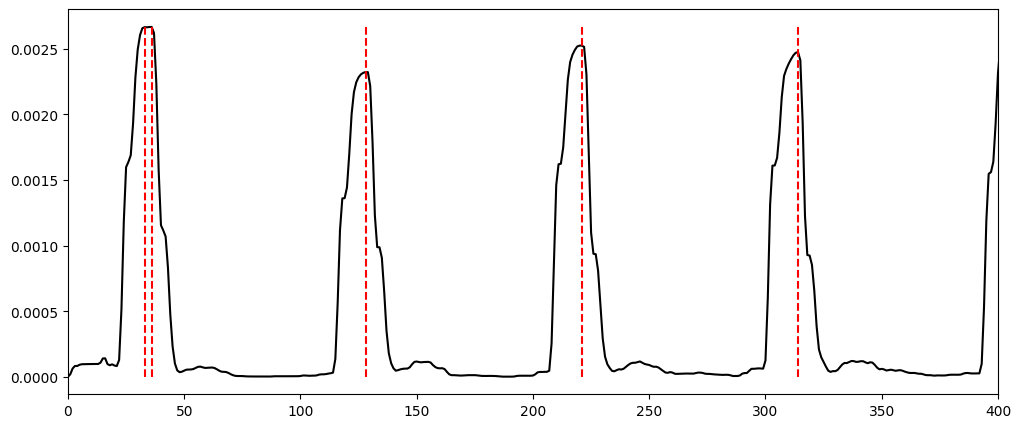

In [37]:
plt.figure(figsize = (12,5))
plt.plot(window_signal, color = "black")
plt.vlines(peaks_1, ymin=min(window_signal), ymax=max(window_signal), color="red", linestyle = '--')
plt.xlim(0,400)

plt.show

In [38]:
print(peaks_1)

[ 33  36 128 221 314 407 501 596 692 787 868 878 964 974]
